Preprocessing and augmentation for both masks and image files.


In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
image_path="./stage1_train"
image_folder=os.listdir(image_path)
image_save_folder="./Preprocess"
image_augment_folder="./Augmentation"
H=128
W=128
size=(W,H)
def preprocessing(col):
    col2=cv2.resize(col,size)
    col2 = cv2.cvtColor(col2,cv2.COLOR_RGB2GRAY) ###is it BGR2GRAY
    col2 = cv2.GaussianBlur(col2,(5,5),0)
    col2 = cv2.normalize(col2, None, 0, 1.0,cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return(col2)
masks='masks'
images='images'
filename_suffix='png'   
#preprocessing(col)

for filename in os.listdir(image_path):
    #print(filename)
    ###Creating a new filepath for every folder 'Images' subfolder under the sample ID
    file_path = os.path.join(image_path, filename)
    #print('image and mask subfolder located at:',file_path)
    img_path=os.path.join(file_path,images,filename+ '.' + filename_suffix)  ###creating filepath to retrieve images from
    #print('Image retrieved from',img_path)
    img=cv2.imread(img_path)
    img=preprocessing(img)
    #plt.imshow(img,cmap='gray')
    #plt.show()
    #print(file_path)
    image_save_folder_final=os.path.join(image_save_folder,filename,images)
    os.makedirs(image_save_folder_final) 
    ###creating new folder with sample ID and a subfolder 'images'
    #print('image saved:',image_save_folder_final)
    os.chdir(image_save_folder_final) 
    #os.path.exists(image_save_folder)
    img = cv2.convertScaleAbs(img, alpha=(255.0))
    new_filename=filename+'.'+filename_suffix
    cv2.imwrite(new_filename,img)
    mask_name=filename
    mask_save_folder_final=os.path.join(image_save_folder,mask_name,masks)
    os.makedirs(mask_save_folder_final)
    os.chdir(mask_save_folder_final) 
    ######Creating a new filepath for every folder 'Masks' subfolder under the sample ID
    ###augmentation
    mask_path=os.path.join(file_path,masks)  ###creating filepath to retrieve images from
    #print('main mask folder is:',mask_path)
    for filename in os.listdir(mask_path):
        mask_sub_path=os.path.join(mask_path,filename)
        #print('individual mask files taken from',mask_sub_path)
        mask=cv2.imread(mask_sub_path)
        mask=cv2.resize(mask,size)
        #plt.imshow(mask)
        #plt.show()
        new_mask_filename=filename+'.'+filename_suffix
        cv2.imwrite(new_mask_filename,mask)
    ###mirror image
    flip_filename, ext = os.path.splitext(new_filename)
    flip_filename=flip_filename + '_mirror'
    #print('flip_filename is',flip_filename)
    augment_path=os.path.join(image_augment_folder,flip_filename)
    image_augment_folder_save=os.path.join(augment_path,images)
    os.makedirs(image_augment_folder_save)  
    #print('image_augment folder is',image_augment_folder_save)
    os.chdir(image_augment_folder_save)
    flip_img=np.fliplr(img)             ####mirror image along the vertical left side
    #plt.imshow(flip_img,cmap='gray')
    plt.show()
    flip_filename=flip_filename+'.'+filename_suffix
    cv2.imwrite(flip_filename,flip_img)
    mask_augment_folder_save=os.path.join(augment_path,masks)
    os.makedirs(mask_augment_folder_save) 
    os.chdir(mask_augment_folder_save)
    for filename in os.listdir(mask_path):
        mask_sub_path=os.path.join(mask_path,filename)
        #print('individual mask files taken from',mask_sub_path)
        mask=cv2.imread(mask_sub_path)
        mask=cv2.resize(mask,size)
        flip_mask=np.fliplr(mask)
        #plt.imshow(mask)
        #plt.show()
        flip_mask_filename, ext = os.path.splitext(filename)
        flip_mask_filename=flip_mask_filename+'_mirror'+'.'+filename_suffix
        cv2.imwrite(flip_mask_filename,flip_mask)
    ####mirror up down  flip
    rot_filename, ext = os.path.splitext(new_filename)
    rot_filename=rot_filename + '_updown'
    #print('rot_filename is',rot_filename)
    rot_path=os.path.join(image_augment_folder,rot_filename)
    image_rot_folder_save=os.path.join(rot_path,images)
    os.makedirs(image_rot_folder_save)  
    #print('image_augment folder is',image_rot_folder_save)
    os.chdir(image_rot_folder_save)
    rot_img=np.flipud(img)           ####horizontal rotation
    #plt.imshow(rot_img,cmap='gray')
    plt.show()
    rot_filename=rot_filename+'.'+filename_suffix
    cv2.imwrite(rot_filename,rot_img)
###90 degree flip
    mask_rot_folder_save=os.path.join(rot_path,masks)
    os.makedirs(mask_rot_folder_save)
    os.chdir(mask_rot_folder_save)
    mask_path=os.path.join(file_path,masks)
    for filename in os.listdir(mask_path):
        mask_sub_path=os.path.join(mask_path,filename)
        #print('individual mask files for rot',mask_sub_path)
        mask=cv2.imread(mask_sub_path)
        mask=cv2.resize(mask,size)
        rot_mask=np.flipud(mask)
        #print('mask rotated')
        #plt.imshow(mask)
        plt.show()
        rots_mask_filename, ext = os.path.splitext(filename)
        rot_mask_filename=rots_mask_filename+'_updown'+'.'+filename_suffix
        plt.imsave(rot_mask_filename,rot_mask)
    
  

    





    
    
    


###Creating figure 1B preprocessing visualisation

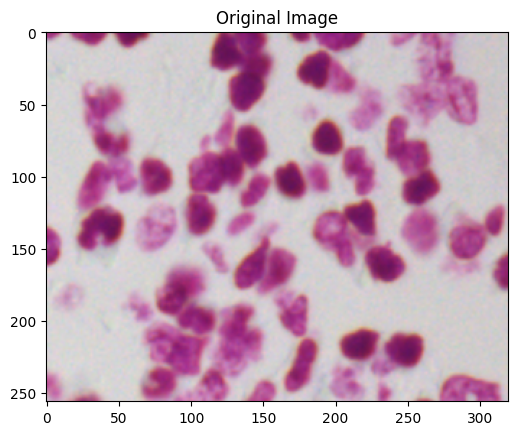

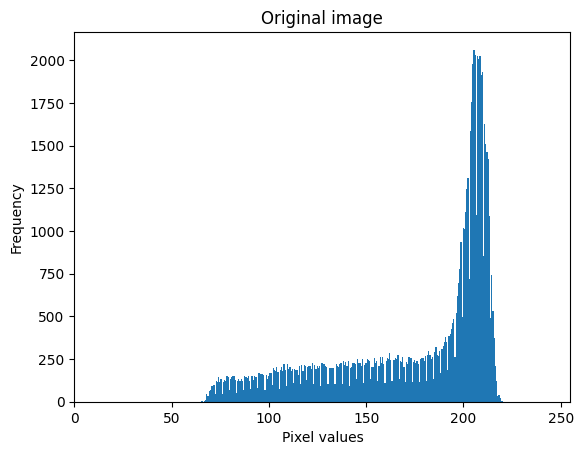

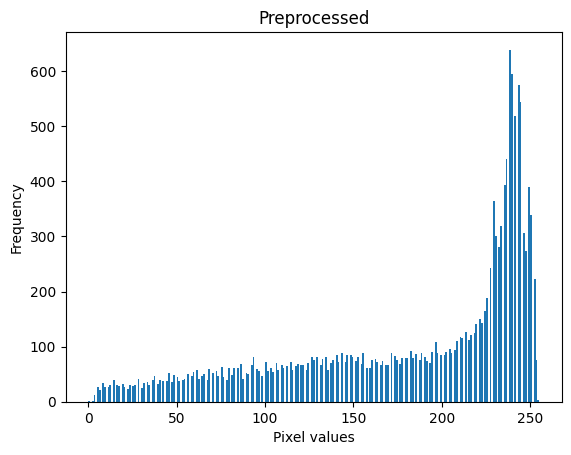

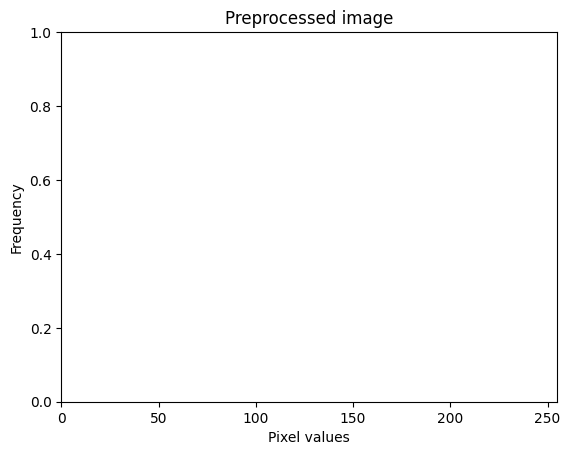

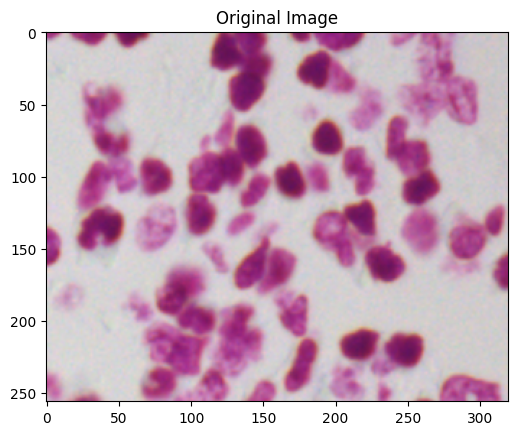

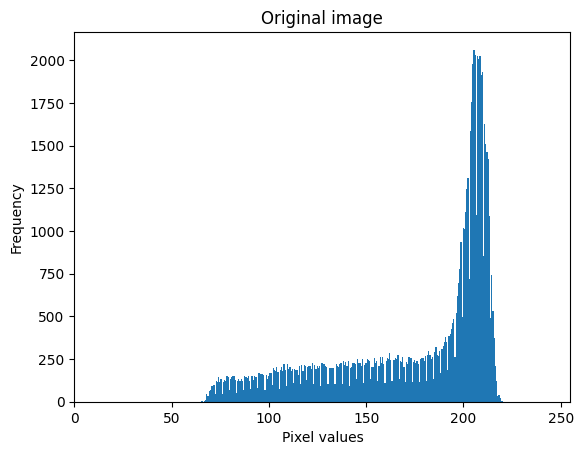

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


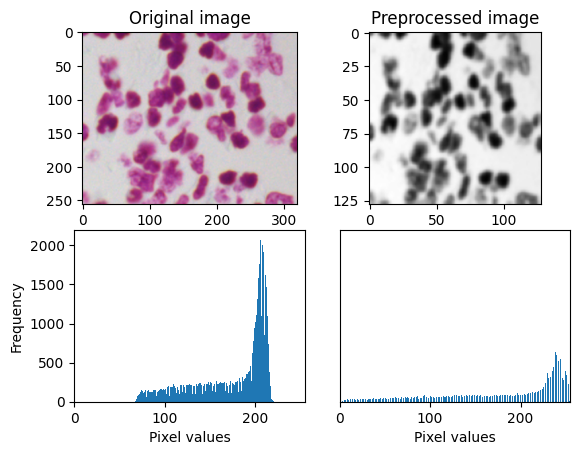

In [81]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.gridspec import GridSpec
###image intensity visualisation.
image1="./stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"
image1_preprocessed="./Preprocess/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"
img_intensity=cv2.imread(image1)
plt.imshow(img_intensity)
plt.title('Original Image')
plt.show()

import matplotlib.pyplot as plt
import cv2


im = cv2.imread(image1)
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.title('Original image')
plt.xlim([0,255])
plt.show()

im2 = cv2.imread(image1_preprocessed)
# calculate mean value from RGB channels and flatten to 1D array
vals = im2.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.title('Preprocessed')
plt.show()
# calculate mean value from RGB channels and flatten to 1D array
vals = im2.mean(axis=2).flatten()
# plot histogram with 255 bins

plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.title('Preprocessed image')
plt.xlim([0,255])
plt.show()


import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.gridspec import GridSpec
###image intensity visualisation.
image1="./stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"
image1_preprocessed="./Preprocess/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"
img_intensity=cv2.imread(image1)
plt.imshow(img_intensity)
plt.title('Original Image')
plt.show()

import matplotlib.pyplot as plt
import cv2


im = cv2.imread(image1)
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.title('Original image')
plt.xlim([0,255])
plt.show()

im2 = cv2.imread(image1_preprocessed)
plt.imshow(im2)


gs = GridSpec(17, 17)
ax1 = plt.subplot(gs[0:8, 0:8])
ax2 = plt.subplot(gs[0:8,9:17])
ax1.imshow(im)
ax1.set_title('Original image')
ax2.imshow(im2)
ax2.set_title('Preprocessed image')
ax3 = plt.subplot(gs[9:17,0:8])
# plot histogram with 255 bins
vals = im.mean(axis=2).flatten()
b, bins, patches = ax3.hist(vals, 255)
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.xlim([0,255])
plt.ylim([0,2200])
ax4 = plt.subplot(gs[9:17,9:17])
# plot histogram with 255 bins
vals = im2.mean(axis=2).flatten()
b, bins, patches = ax4.hist(vals, 255)
plt.xlabel('Pixel values')
plt.xlim([0,255])
plt.ylim([0,2200])
plt.yticks([], [])





 

###Creating figure 1A from report below: (Augmentation)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.gridspec import GridSpec
###image intensity visualisation.
image_original="./stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"
image_preprocessed="./Preprocess/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"
image_lr="./Augmentation/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_mirror/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_mirror.png"
image_ud="./Updown Mirror/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_updown/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_updown.png"

img=cv2.imread(image_original)
plt.imshow(img)
img_pre=cv2.imread(image_preprocessed)
plt.imshow(img_pre)
img_lr=cv2.imread(image_lr)
img_ud=cv2.imread(image_ud)


gs = GridSpec(18, 27) 
ax1 = plt.subplot(gs[0:8, 0:8])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax2 = plt.subplot(gs[0:8,9:17]
plt.xticks([],[])
plt.yticks(fontsize=6)
ax1.imshow(img)
ax1.set_title('Original',fontsize=8)
ax2.imshow(img_pre)
ax2.set_title('Preprocessed',fontsize=8)
ax3 = plt.subplot(gs[0:8,18:26])
plt.xticks(fontsize=7)
plt.yticks([], [])
ax3.set_title('Left-Right',fontsize=8)
ax3.imshow(img_lr)
ax4 = plt.subplot(gs[9:17,9:17])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax4.set_title('Up-Down',fontsize=8)
ax4.imshow(img_ud)


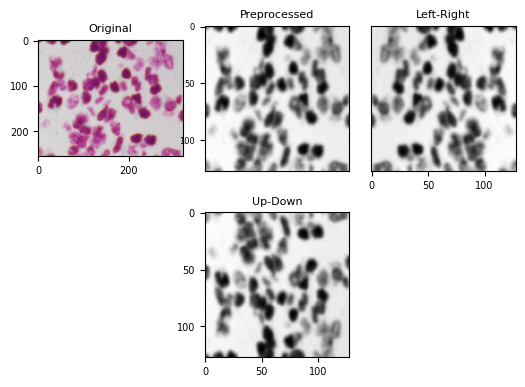

In [56]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.gridspec import GridSpec
###image intensity visualisation.
image_original="./stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"
image_preprocessed="./Preprocess/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png"
image_lr="./Augmentation/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_mirror/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_mirror.png"
image_ud="./Updown Mirror/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_updown/images/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_updown.png"

img=cv2.imread(image_original)
plt.imshow(img)
img_pre=cv2.imread(image_preprocessed)
plt.imshow(img_pre)
img_lr=cv2.imread(image_lr)
img_ud=cv2.imread(image_ud)


gs = GridSpec(18, 27) 
ax1 = plt.subplot(gs[0:8, 0:8])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax2 = plt.subplot(gs[0:8,9:17])
plt.xticks([],[])
plt.yticks(fontsize=6)
ax1.imshow(img)
ax1.set_title('Original',fontsize=8)
ax2.imshow(img_pre)
ax2.set_title('Preprocessed',fontsize=8)
ax3 = plt.subplot(gs[0:8,18:26])
plt.xticks(fontsize=7)
plt.yticks([], [])
ax3.set_title('Left-Right',fontsize=8)
ax3.imshow(img_lr)
ax4 = plt.subplot(gs[9:17,9:17])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
ax4.set_title('Up-Down',fontsize=8)
ax4.imshow(img_ud)

